# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import analytic

import thinkstats2
import thinkplot

# Chapter 5  Modeling distributions

Distributions used so far = **empirical distributions**, which b/c they;re based on **empirical observations**, are necessarily *finite samples*.

Alternative = **analytic distribution** = characterized by a CDF that is a mathematical function. 

Analytic distributions can be used to **model** empirical distributions. 

* In this context, a **model** = a simplification that leaves out unneeded details.


## Exponential distribution

Here's what the exponential CDF looks like with a range of parameters.

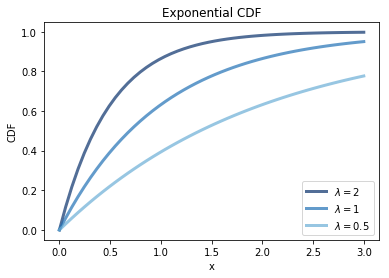

In [2]:
thinkplot.PrePlot(3) # 3 graphs on 1 plot
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='x', ylabel='CDF', 
                 loc='lower right')

The **lamba parameter**, **λ**, determines the shape of the distribution

In the "real world", exponential distributions come up when we look at a series of events + measure the times between events = **interarrival times**. 

*If events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution*.

#### Example: Interarrival time of births.
On December 18, 1997, 44 babies were born in a hospital in Brisbane, Australia + the time of birth for all 44 babies was reported in the local paper.

Here's the distribution of interarrival times from a dataset of birth times.

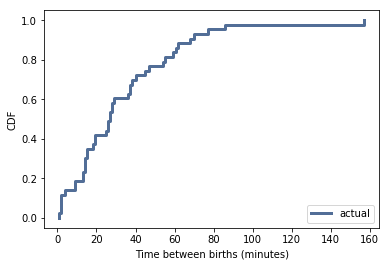

In [3]:
df = analytic.ReadBabyBoom() # new data
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Time between births (minutes)', ylabel='CDF')

About 90% of events (births) occured w/in 80 minutes or less of each other. The general shape also seems to look exponential, which means *events were equally likely to occur at any time*.

To check if its *really* exponential, take the log of the **complementary CDF (CCDF) = 1 - CDF(x)** and plot it. This is because if **y ≈ e^(−λ x)**, then taking the log of both sides yields **logy ≈ (−λ x)**, so if it was *truly* exponential, we'd see a straight line (y = -λ, or -λ = slope).

Here's what the CCDF looks like on a log-y scale a + remember *a straight line = consistent w/ an exponential distribution.*

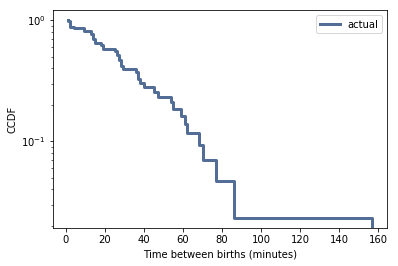

In [4]:
# make CDF into complementary CDF (CCDF)
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Time between births (minutes)',
                 ylabel='CCDF', yscale='log', loc='upper right')

It starts out looking that way, but it's not *exactly* straight, indicating the *exponential distribution is not the right fit for this data*. The underlying assumption (a birth is equally likely at any time of day) is not exactly true. 

Nevertheless, it *might* be reasonable to **model** this dataset w/ an exponential distribution. 

W/ that simplification, we can summarize the distribution with a single parameter, λ, which can be interpreted as a **rate** (i.e. the # of events that occur, on average, in a unit of time).

Here, 44 babies are born in 24 hours, so rate is λ = 

In [5]:
44/(24*60)

0.030555555555555555

So rate is λ = 0.0306 births per minute. 

The **mean of an exponential distribution is 1/λ**, so the mean time between births is

In [6]:
1/(44/(24*60))

32.72727272727273

The mean time between births is 32.7 minutes.

## Normal (Gaussian) distribution

This is commonly used b/c it describes many phenomena (at least approximately) + there is a good reason for its ubiquity

Normal distribution is characterized by 2 parameters: mean (µ) + standard deviation σ. 

Normal distribution w/ µ = 0 and σ = 1 --> the **standard normal distribution** + its CDF is defined by an integral that does NOT have a closed form solution

* But there are algorithms that evaluate it efficiently. 
* 1 is provided by **SciPy** --> **scipy.stats.norm** = an object that represents a normal distribution + provides a method, **cdf**, that evaluates the standard normal CDF:

In [7]:
import scipy.stats
scipy.stats.norm.cdf(0)

0.5

This result is correct b/c the median of the standard normal distribution = 0 (same as the mean) + 1/2 of values fall below the median, so CDF(0) is 0.5 = the cumulative probability up to the mean/median of 0 is 50%

**norm.cdf** takes optional parameters: **loc** = specifies the mean, and **scale**, = specifies the standard deviation.

thinkstats2 makes this function a little easier w/ **EvalNormalCdf**, which takes parameters mu + sigma + evaluates the CDF at x:

Here's what the normal distributions CDF looks like with a range of parameters. 

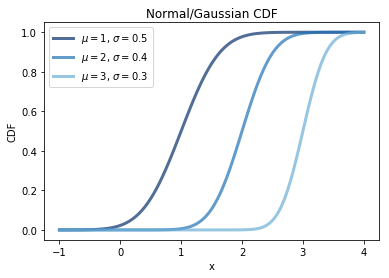

In [8]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal/Gaussian CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

The **sigmoid** shape of these curves is a recognizable characteristic of a normal distribution.


Now look back at the empirical CDF of weights for all live births + the CDF of a normal distribution w/ the same mean + variance

* i.e. *use a normal model to fit the distribution of birth weights from the NSFG.*

Mean, Var, Sigma 7.28088310002 1.54521257035 1.24306579486


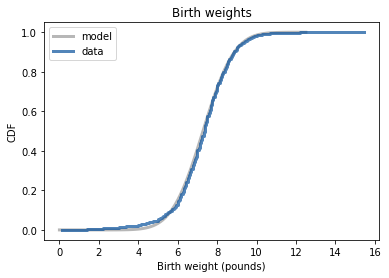

In [9]:
# get data
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
sigma = np.sqrt(var)

print('Mean, Var, Sigma', mu, var, sigma)

# plot the normal model that fits distribution of birth weights
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)
thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(weights, label='data')
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Birth weights',
                 xlabel='Birth weight (pounds)',
                 ylabel='CDF')

We can see the observed CDF + the model, where the model fits the data well except in the left tail (grey line is a bit under the blue line).

The normal distribution is a good model for this dataset, so if we summarize the birth weights distribution w/ parameters µ = 7.28 + σ = 1.24, the resulting **error** (difference between the model + the data) is small.

But we make note that below the 10th percentile (lower tail), there is a discrepancy between the data and the model, wherein there are *more* light babies than expected in a normal distribution. 

If we are specifically interested in preterm babies, it'd be important to get this part of the distribution right, so it might not be appropriate to use the normal model.

## 5.3  Normal probability plot

For exponential distributions + a few others, there are simple transforms we can use to test whether an analytic distribution is a good model for a dataset.

For the normal distribution, *there is no such transform*, but there is an alternative = A **normal probability plot** =  a visual test for normality. 

There are 2 ways to generate a normal probability plot. Here’s the easy way:

* Sort the values in the sample.
* From a standard normal distribution (µ = 0, σ = 1), generate a random sample w/ same size as sample + sort it.
* Plot sorted values from the sample vs. the random values.

If the distribution of the sample is approximately normal, the result is a straight line w/ intercept µ and slope σ.

The following example shows that if the data are actually from a normal distribution, the plot is approximately straight.

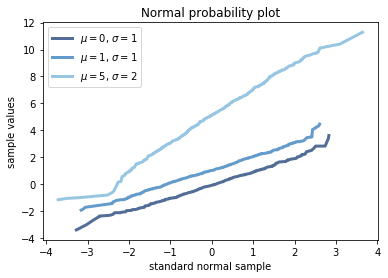

In [10]:
n = 1000
thinkplot.PrePlot(3) 

mus = [0, 1, 5]
sigmas = [1, 1, 2]

# create list of tuples of mu + sigma
for mu, sigma in zip(mus, sigmas): 
    # sample 1k from each distribution
    sample = np.random.normal(mu, sigma, n)
    # take sample, return 2 arrays
    xs, ys = thinkstats2.NormalProbability(sample) 
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample',
                 ylabel='sample values')

**ys** = sorted values from sample; **xs** = random values from the standard normal distribution.

The lines are approximately straight w/ values in the tails deviating more so than values near the mean.

Now try it w/ real data + code to generate a normal probability plot for birth weight data.

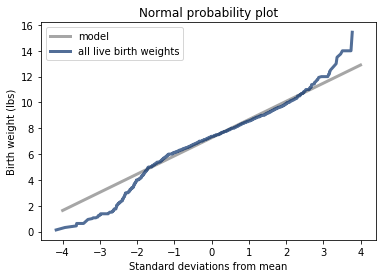

In [11]:
def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()
    
    ## fit the 'best'/normal line
    xs = [-4, 4] 
    # input sequence of xs, an intercept, + a slope + get: xs + ys = a line w/ given parameters, evaluated at the values in xs.
    fxs, fys = thinkstats2.FitLine(xs, inter = mean, slope = std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    
    # plot line of actual probability converted to normal
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='all live birth weights')
    #thinkplot.Plot(xs, ys, label='all live')
    thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')
    
MakeNormalPlot(weights)

Gray line = the model + blue line = the data.

**FitLine** takes a sequence of xs, an intercept, + a slope; It returns xs + ys = a line w/ the given parameters, evaluaed at the values in xs.

**NormalProbability** returns xs + ys that contain values from the standard normal distribution + values from `weights`. 

If the distribution of `weights is normal`, the data should match the model.

We see that the lightest babies are lighter than we expect from the normal mode, + the heaviest babies are heavier.

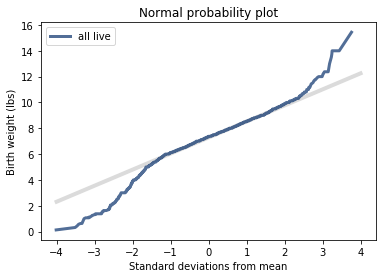

In [12]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label='all live')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')

If we suspect that the deviation in the left tail is due to preterm babies, we can check by selecting only full term births.

In [13]:
full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

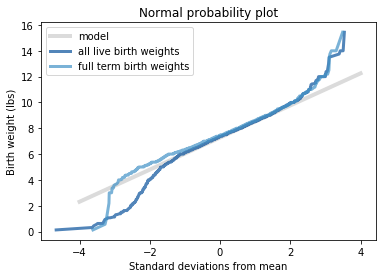

In [14]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8', label='model')

thinkplot.PrePlot(2) 
xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label='all live birth weights')

xs, ys = thinkstats2.NormalProbability(term_weights)
thinkplot.Plot(xs, ys, label='full term birth weights')
thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')

Now the deviation in the left tail is almost gone, but the heaviest babies are still heavy.

W/ only full term births, we remove some of the lightest weights + some discrepancy in the lower tail of the distribution, but add some in the upper tail (heaviest weights).

This plot suggests that the normal model describes the distribution well w/in a few SD's from the mean, but *not in the tails*. 

Whether it is good enough for practical purposes depends on the purposes

## Lognormal model

If the *logarithms of a set of values* have a normal distribution, the values have a **lognormal distribution**. 

CDF of the lognormal distribution = same as CDF of the normal distribution, w/ logx substituted for x.

* **CDF.lognormal(x) = CDF.normal(logx)**

The parameters of the lognormal distribution are usually denoted µ and σ, which are *NOT* the mean and standard deviation

* mean of a lognormal distribution = exp(µ + σ2/2)
* standard deviation is ugly (http://wikipedia.org/wiki/Log-normal_distribution)

If a sample is approximately lognormal (log values have normal distribution) + you plot its CDF on a log-x scale, it will have the shape of a normal distribution. 

To test how well a sample fits a lognormal model, make a normal probability plot using the *log of the values* in the sample.

As an example of a lognormal distribution, look at adult weights from the BRFSS

In [15]:
import brfss
df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

The following estimates the parameters of a normal distribution + plots the data + a normal model.

In [49]:
def MakeNormalModel(data):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    # get CDF of data
    cdf = thinkstats2.Cdf(data, label='weights')

    # get summary stats of data
    mean, var = thinkstats2.TrimmedMeanVar(data)
    std = np.sqrt(var)
    print('n, mean, std', len(data), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std
    
    # create CDF model
    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    # plot model
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    
    # plot actual data
    thinkplot.Cdf(cdf)

Here's the distribution of adult weights and a normal model, which is not a very good fit.

n, mean, std 398484 78.595995657 17.7545551918


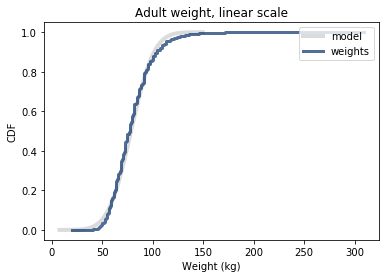

In [50]:
# plot model + data
MakeNormalModel(weights)
thinkplot.Config(title='Adult weight, linear scale', xlabel='Weight (kg)',
                 ylabel='CDF', loc='upper right')

Here's the distribution of adult weight + a **lognormal model**, plotted on a log-x scale.  

The log model is a better fit for the data, although heaviest people are heavier than the model expects.

But, this representation of the data does not make the difference in models particularly dramatic.

n, mean, std 398484 1.88466071373 0.0962358025915


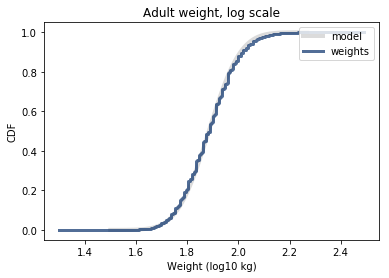

In [51]:
# convert weights to log
log_weights = np.log10(weights)

# make a normal model of log of weights
MakeNormalModel(log_weights)

thinkplot.Config(title='Adult weight, log scale', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='upper right')

The following function generates a normal probability plot.

In [52]:
def MakeNormalPlot(data):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    # get summary stats
    mean, var = thinkstats2.TrimmedMeanVar(data, p=0.01)
    std = np.sqrt(var)
    
    # get best-fit line w/ a sequence of xs, an intercept, + a slope + get: xs + ys = a line w/ given parameters, 
    #  evaluated at the values in xs.
    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    
    # plot model line
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    # plot "real data"
    xs, ys = thinkstats2.NormalProbability(data)
    thinkplot.Plot(xs, ys, label='weights')

When we generate a normal probability plot with adult weights, we can see clearly that the data deviate from the model systematically.

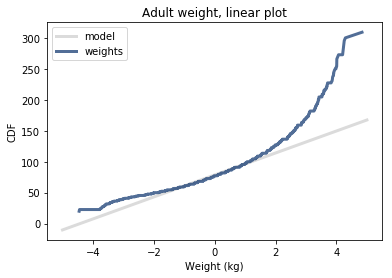

In [53]:
MakeNormalPlot(weights)
thinkplot.Config(title='Adult weight, linear plot', xlabel='Weight (kg)',
                 ylabel='CDF', loc='upper left')

If we make a normal probability plot along with **log weights**, the model fit the data well except in the tails, where heaviest people exceed expectations.

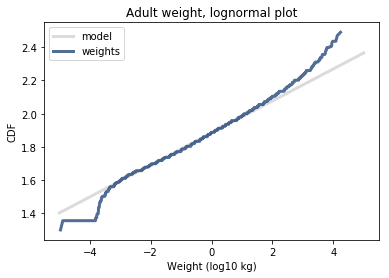

In [21]:
MakeNormalPlot(log_weights)
thinkplot.Config(title='Adult weight, lognormal plot', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='upper left')

*Now* it is apparent that the data deviate substantially from the normal model. 

On the other hand, the lognormal model is a good match for the data.

## Pareto distribution

Named after economist Vilfredo Pareto, who used it to describe the distribution of wealth, + has been used to describe phenomena in the natural + social sciences, including sizes of cities + towns, sand particles + meteorites, forest fires + earthquakes.

Here's what the Pareto CDF looks like with a range of parameters.

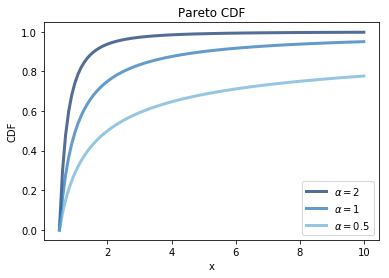

In [22]:
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
    thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',

                 ylabel='CDF', loc='lower right')

There is a simple visual test that indicates whether an **empirical distribution** fits a **Pareto distribution**: *on a log-log scale, the CCDF looks like a straight line.* 

This works b/c if you plot the CCDF of a sample from a Pareto distribution on a linear scale, you expect to see a function like:

* y = (x / x.m) ^ -α

Taking the log of both sides yields:

* log(y) = -α * (log(x) - log(x.m)

So if you plot log(y) versus log(x), it should look like a straight line w/ slope = −α + intercept = α * log(x.m).

As an example, let’s look at the sizes of cities + towns w/ data from U.S. Census Bureau (publishes population of every incorporated city + town in the US), which is sometimes said to be Pareto-like.

In [23]:
import populations

pops = populations.ReadData()
print('Number of cities/towns', len(pops))

Number of cities/towns 19515


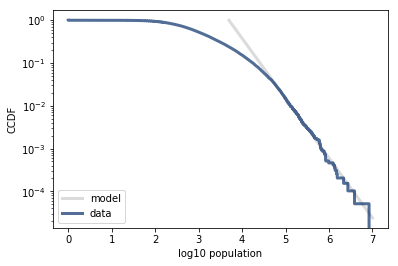

In [54]:
# convert populations to natural log
log_pops = np.log10(pops)

# get the CDFs of actual + log data
cdf = thinkstats2.Cdf(pops, label='data')
cdf_log = thinkstats2.Cdf(log_pops, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

The Pareto model fits the data well in the lower tail, so the lognormal model might be a better fit for this data (as is often the case for things that are supposed to be Pareto).

The largest 1% of cities + towns, below 10^−2, fall along a straight line. So we could conclude, as some researchers have, that the tail of this distribution fits a Pareto model.

On the other hand, a lognormal distribution also models the data well.

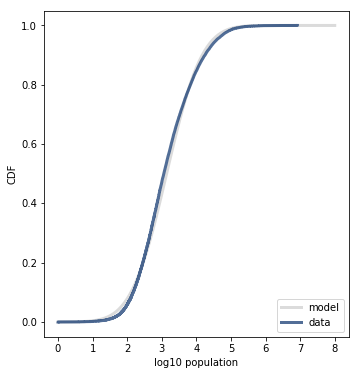

In [25]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CDF', loc='lower right')

The above CDF of city and town populations is on a log-x scale + shows good agreement between the data and the model.

Here is a normal probability plot of log-transformed population.

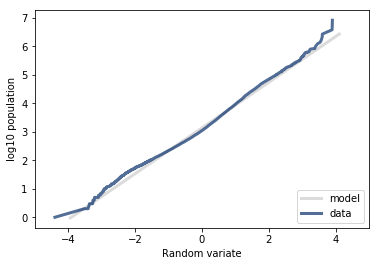

In [26]:
thinkstats2.NormalProbabilityPlot(log_pops, label='data')
thinkplot.Config(xlabel='Random variate',
                 ylabel='log10 population',
                 xlim=[-5, 5])

Neither model is perfect. 

* Pareto model only applies to the largest 1% of cities + is a better fit for that part of the distribution. 
* The lognormal model is a better fit for the other 99%. 

Which model is appropriate depends on which part of the distribution is relevant.

## 5.6  Generating Random Variates

Analytic CDFs can be used to generate random #'s w/ a given distribution function, **`p = CDF(x)`**. 

If there is an efficient way to compute the **inverse CDF**, we can generate random values w/ the appropriate distribution by choosing **p** from a uniform distribution between 0-1, then choosing **`x = ICDF(p)`**.

For example, the CDF of the exponential distribution is **p = 1 − e^(−λx)**

Solving for x yields **x = −log(1 − p) / λ **

So in Python we can write

In [55]:
import random

def expovariate(lam):
    """
    Take a lambda parameters + return a random value from 
    the exponential distribution with given lambda
    """
    p = random.random()
    x = -np.log(1-p) / lam
    return x

Since log0 is undefined, be careful. The implementation of `random.random` can return 0 but not 1, so 1 − p can be 1 but not 0, so `log(1-p)` is *always* defined.

To summarize, when we have an analytic CDF, we can sometimes **invert** it to generate random values.

We can test it by generating a sample + plotting the CCDF on a log-y scale.

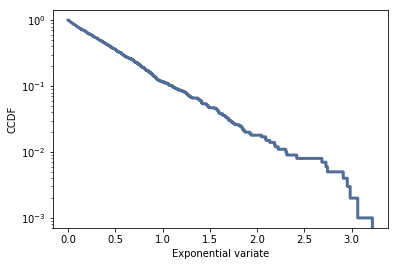

In [28]:
# 1000 random values from exponential distribution with given lambda
t = [expovariate(lam = 2) for _ in range(1000)]

cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Exponential variate', ylabel='CCDF', yscale='log')

A straight line is consistent with an exponential distribution.

As an exercise, write a function that generates a Pareto variate.

# 5.7  Why model?

Many real world phenomena can be modeled with analytic distributions + like all models, analytic distributions are **abstractions** = they leave out details that're considered irrelevant. 

* An observed distribution might have measurement errors/quirks specific to the sample + analytic models smooth out these idiosyncrasies.

Analytic models are also a form of data compression. 

* When a model fits a dataset well, a small set of parameters can summarize a large amount of data.

It is sometimes surprising when data from a natural phenomenon fit an analytic distribution, but these observations can provide insight into physical systems. 

Sometimes we can explain why an observed distribution has a particular form. 

* Ex: Pareto distributions are often the result of generative processes w/ positive feedback (**preferential attachment processes**)

Also, analytic distributions lend themselves to mathematical analysis.

*Remember*: **all models are imperfect** + data from the real world never fit an analytic distribution perfectly. 

People sometimes talk as if data are generated by models (might say distribution of human heights = normal, or distribution of income = lognormal) + taken literally, these claims cannot be true b/c there are always differences between the real world + mathematical models.

**Models are useful IF they capture the *relevant* aspects of the real world + leave out unneeded details**. 

* But what is “relevant” or “unneeded” depends on what you are planning to use the model for.

## Exercises

**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [56]:
import scipy.stats

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [57]:
mu = 178
sigma = 7.7

# create normal distribution of heights w/ given parameters
height_dist = scipy.stats.norm(loc=mu, scale=sigma)
type(height_dist)

scipy.stats._distn_infrastructure.rv_frozen

A **frozen random variable** can compute its mean and standard deviation.

In [58]:
height_dist.mean(), height_dist.std()

(178.0, 7.7000000000000002)

It can also evaluate its CDF.  How many people are more than 1 SD below the mean?  About 16%

In [59]:
height_dist.cdf(mu-sigma)

0.15865525393145741

How many people are between 5'10" and 6'1"?

In [78]:
max_height_cm = 6*(30.48)+1*(2.54)
min_height_cm = 5*(30.48)+10*(2.54)

perc_six_one = height_dist.cdf(max_height_cm)
perc_five_ten = height_dist.cdf(min_height_cm)

perc_six_one - perc_five_ten

0.34274683763147368

**About 34.3% of people are between 5'10'' and 6'1''**

**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. 

W/ parameters **xm** = 1 m and **α** = 1.7, we get a distribution w/ a reasonable minimum = 1 m, and median = 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters α = 1.7 and xmin = 1 meter.  So the shortest person is 100 cm and the median is 150.

In [80]:
alpha = 1.7
xmin = 1       # meter
pareto_height_dist = scipy.stats.pareto(b=alpha, scale=xmin)
pareto_height_dist.median()

1.5034066538560549

What is the mean height in Pareto world?

In [79]:
pareto_height_dist.mean()

2.4285714285714288

What fraction of people are shorter than the mean?

In [82]:
pareto_height_dist.cdf(2.4285714285714288)

0.77873969756528805

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [84]:
# get % of people shorter than 1 km
perc_above = pareto_height_dist.cdf(1000)

# get # of people out of 7 billion taller than 1 km
7000000000 * (1 - perc_above)

55602.976430479954

How tall do we expect the tallest person to be?

In [132]:
# find height where only 1 person is taller than
7000000000 * (1 - pareto_height_dist.cdf(618349))

1.0000017480749079

In [135]:
# use `ppf` to evaluate "percent point function" = inverse CDF.
# can compute height in meters that corresponds to probability of (1 - 1/7e9).
pareto_height_dist.ppf(1 - 1/7e9)

618349.61067595053

**Exercise:** The Weibull distribution is a generalization of the exponential distribution that comes up in failure analysis (see http://wikipedia.org/wiki/Weibull_distribution). Its CDF is

$\mathrm{CDF}(x) = 1 − \exp[−(x / λ)^k]$ 

Can you find a transformation that makes a Weibull distribution look like a straight line? What do the slope and intercept of the line indicate?

Use `random.weibullvariate` to generate a sample from a Weibull distribution and use it to test your transformation.

Generate a sample from a Weibull distribution and plot it using a transform that makes a Weibull distribution look like a straight line.

`thinkplot.Cdf` provides a transform that makes the CDF of a Weibull distribution look like a straight line.

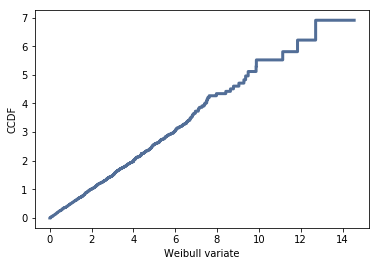

In [40]:
sample = [random.weibullvariate(2, 1) for _ in range(1000)]
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf, transform='weibull')
thinkplot.Config(xlabel='Weibull variate', ylabel='CCDF')

**Exercise:** For small values of `n`, we don’t expect an empirical distribution to fit an analytic distribution exactly. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

For example, in Section 5.1 we plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is based on only 44 data points. To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

Plot the distribution of the random values and compare it to the actual distribution. You can use random.expovariate to generate the values.

In [41]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

n = len(diffs)
lam = 44.0 / 24 / 60
sample = [random.expovariate(lam) for _ in range(n)]

1/lam, np.mean(sample)

(32.72727272727273, 30.525004070184785)

In [42]:
# Solution goes here

In [43]:
# Solution goes here

**Worked Example:** The distributions of wealth and income are sometimes modeled using lognormal and Pareto distributions. To see which is better, let’s look at some data.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc.py`, which reads this file.

Extract the distribution of incomes from this dataset. Are any of the analytic distributions in this chapter a good model of the data?

In [44]:
import hinc
df = hinc.ReadData()
df

,income,freq,cumsum,ps
0,4.999000e+03,4204,4204,0.034330
1,9.999000e+03,4729,8933,0.072947
2,1.499900e+04,6982,15915,0.129963
3,1.999900e+04,7157,23072,0.188407
4,2.499900e+04,7131,30203,0.246640
5,2.999900e+04,6740,36943,0.301679
6,3.499900e+04,6354,43297,0.353566
7,3.999900e+04,5832,49129,0.401191
8,4.499900e+04,5547,54676,0.446488
9,4.999900e+04,5254,59930,0.489392


Here's what the CDF looks like on a linear scale.

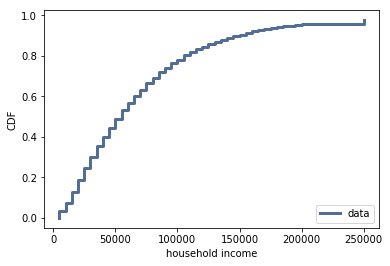

In [45]:
xs, ps = df.income.values, df.ps.values
cdf = thinkstats2.Cdf(xs, ps, label='data')
cdf_log = thinkstats2.Cdf(np.log10(xs), ps, label='data')
    
# linear plot
thinkplot.Cdf(cdf) 
thinkplot.Config(xlabel='household income',
                   ylabel='CDF')

To check whether a Pareto model describes the data well, I plot the CCDF on a log-log scale.

I found parameters for the Pareto model that match the tail of the distribution.

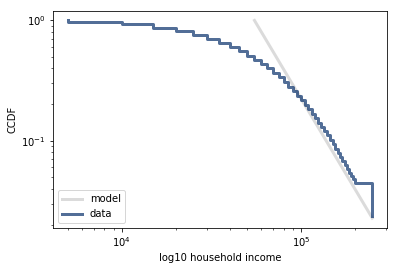

In [46]:
xs, ys = thinkstats2.RenderParetoCdf(xmin=55000, alpha=2.5, 
                                     low=0, high=250000)

thinkplot.Plot(xs, 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf, complement=True) 
thinkplot.Config(xlabel='log10 household income',
                 ylabel='CCDF',
                 xscale='log',
                 yscale='log', 
                 loc='lower left')

For the lognormal model I estimate mu and sigma using percentile-based statistics (median and IQR).

In [47]:
median = cdf_log.Percentile(50)
iqr = cdf_log.Percentile(75) - cdf_log.Percentile(25)
std = iqr / 1.349

# choose std to match the upper tail
std = 0.35
print(median, std)

4.74035479316 0.35


Here's what the distribution, and fitted model, look like on a log-x scale.

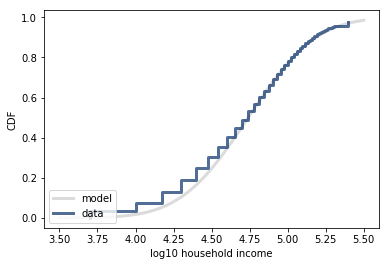

In [48]:
xs, ps = thinkstats2.RenderNormalCdf(median, std, low=3.5, high=5.5)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 household income',
                 ylabel='CDF')

My conclusions based on these figures are:

1) The Pareto model might be a reasonable choice for the top
   10-20% of incomes.

2) The lognormal model captures the shape of the distribution better,
   with some deviation in the left tail.  With different
   choices for sigma, you could match the upper or lower tail, but not
   both at the same time.
 
In summary I would say that neither model captures the whole distribution,
so you might have to 

1) look for another analytic model, 

2) choose one that captures the part of the distribution that is most 
   relevent, or 

3) avoid using an analytic model altogether.